In [1]:
import pandas as pd
import numpy as np

In [2]:
dtf = pd.read_csv("data/data_houses.csv")
cols = ["OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","FullBath","YearBuilt","YearRemodAdd",
        "LotFrontage","MSSubClass"]
dtf = dtf[["Id"]+cols+["SalePrice"]]
dtf.head()

,Id,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,LotFrontage,MSSubClass,SalePrice
0,1,7,1710,2,548,856,2,2003,2003,65.0,60,208500
1,2,6,1262,2,460,1262,2,1976,1976,80.0,20,181500
2,3,7,1786,2,608,920,2,2001,2002,68.0,60,223500
3,4,7,1717,3,642,756,1,1915,1970,60.0,70,140000
4,5,8,2198,3,836,1145,2,2000,2000,84.0,60,250000


In [3]:
from mlforeveryone.overview import dtf_overview, check_pk

Shape: (1460, 12)
-----------------
Id --> Type:num | Nas: 0(0%) | Min-Max: (1)-(1460) | Possible PK
OverallQual --> Type:cat | Nas: 0(0%) | Categories: 10
GrLivArea --> Type:num | Nas: 0(0%) | Min-Max: (334)-(5642)
GarageCars --> Type:cat | Nas: 0(0%) | Categories: 5
GarageArea --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1418)
TotalBsmtSF --> Type:num | Nas: 0(0%) | Min-Max: (0)-(6110)
FullBath --> Type:cat | Nas: 0(0%) | Categories: 4
YearBuilt --> Type:num | Nas: 0(0%) | Min-Max: (1872)-(2010)
YearRemodAdd --> Type:num | Nas: 0(0%) | Min-Max: (1950)-(2010)
LotFrontage --> Type:num | Nas: 259(17%) | Min-Max: (21)-(313)
MSSubClass --> Type:cat | Nas: 0(0%) | Categories: 15
SalePrice --> Type:num | Nas: 0(0%) | Min-Max: (34900)-(755000)


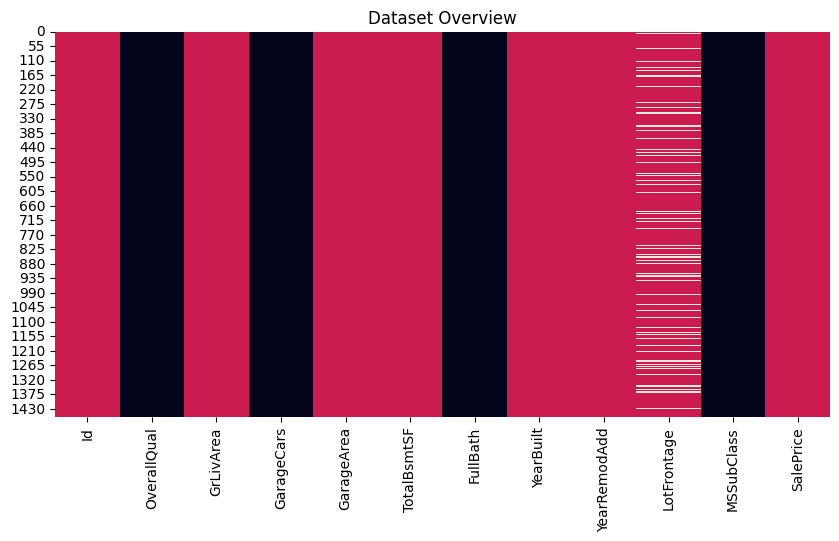

 Categerocial   Numerical/DateTime   NaN 


In [4]:
dtf_overview(dtf, max_cat=20, figsize=(10,5))

In [32]:
dtf = dtf.set_index("Id")
dtf = dtf.rename(columns={"SalePrice":"Y"})

In [33]:
features = []

In [34]:
from mlforeveryone.plot import freqdist_plot, bivariate_plot
import warnings
warnings.filterwarnings('ignore')

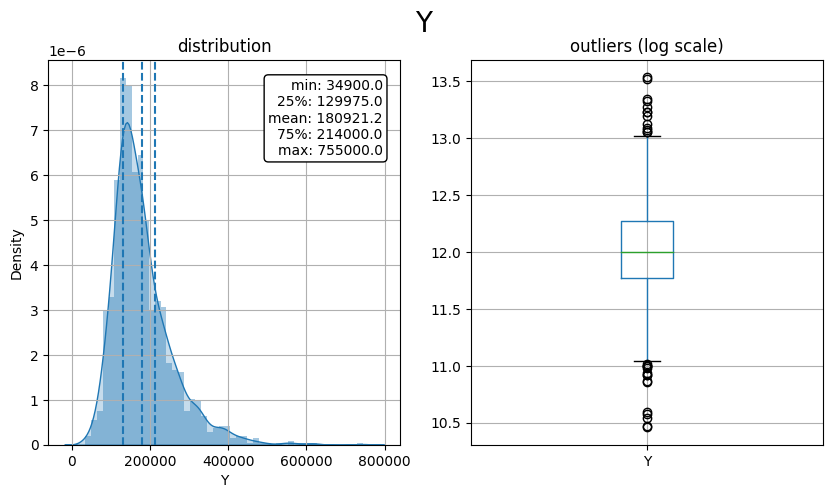

In [35]:
freqdist_plot(dtf, "Y", box_logscale=True, figsize=(10,5))

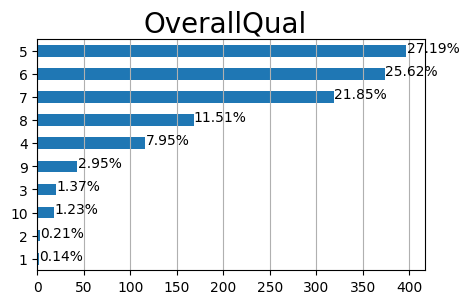

In [36]:
freqdist_plot(dtf, "OverallQual", figsize=(5,3))

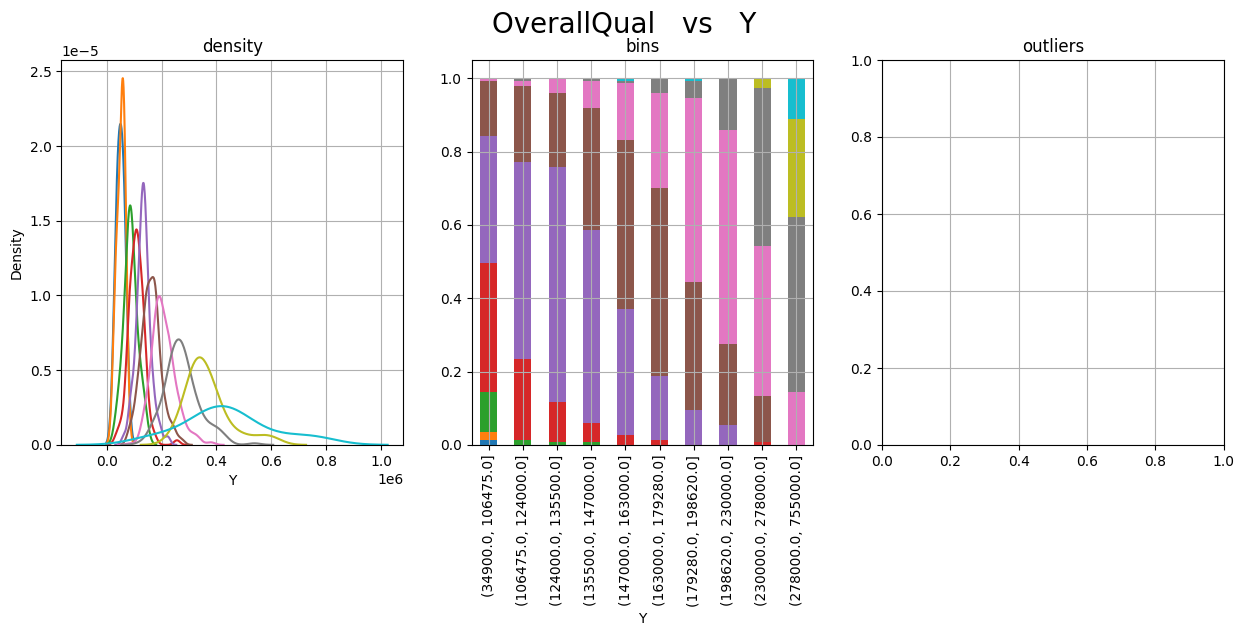

In [37]:
bivariate_plot(dtf, x="OverallQual", y="Y", figsize=(15,5))

In [38]:
#-> OverallQual is Predctive: the higher the quality the higher the price.
features.append("OverallQual")
features

['OverallQual']

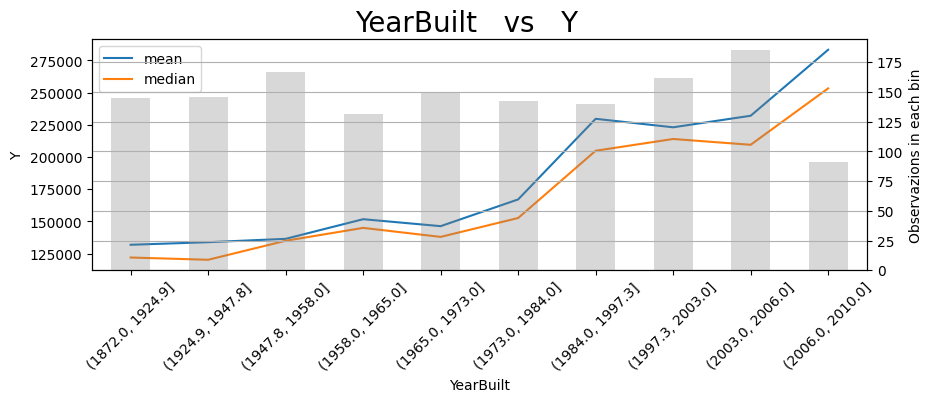

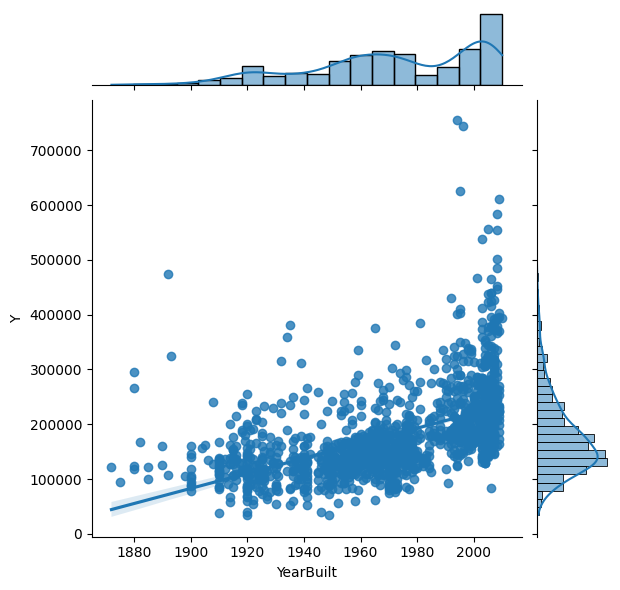

In [39]:
#--- YearBuilt ---#
bivariate_plot(dtf, x="YearBuilt", y="Y", figsize=(10,3))

In [40]:
#-> YearBuilt is Predctive: the more recent the construction the higher the price.
features.append("YearBuilt")

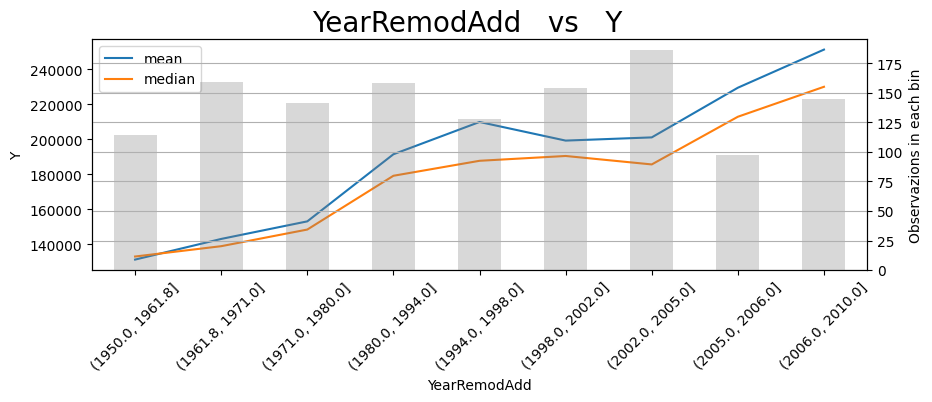

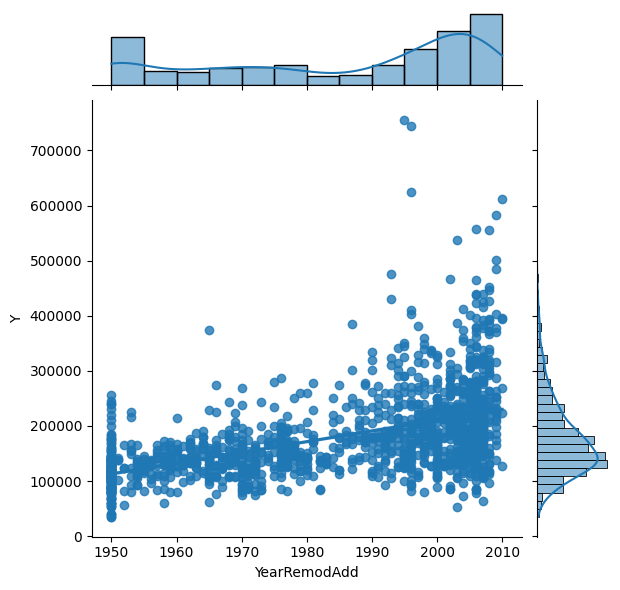

In [41]:
#--- YearRemodAdd ---#
bivariate_plot(dtf, x="YearRemodAdd", y="Y", figsize=(10,3))

In [42]:
#-> YearRemodAdd is Predctive: the more recent the renovation the higher the price.
features.append("YearRemodAdd")

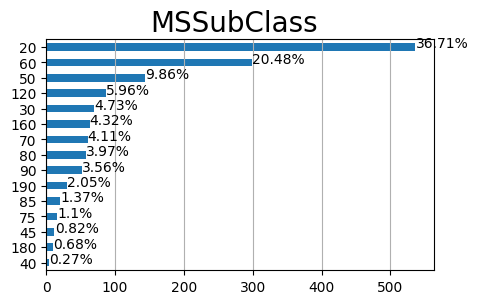

In [43]:
#--- MSSubClass ---#
freqdist_plot(dtf, "MSSubClass", figsize=(5,3))

In [44]:
from mlforeveryone.correlation import corr_matrix, pps_matrix

--- WARNING: Factorizing 3 labels of MSSubClass_cluster ---


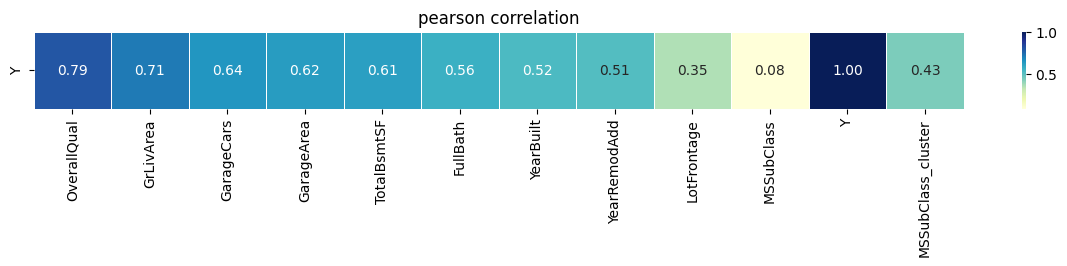

In [45]:
corr = corr_matrix(dtf, method="pearson", negative=False, lst_filters=["Y"], figsize=(15,1))

In [46]:
from mlforeveryone.preprocessing import add_feature_clusters

In [47]:
# I will summarise this categories in clusters
MSSubClass_clusters = {"min":[30,45,180], "max":[60,120], "mean":[]}
dtf = add_feature_clusters(dtf, "MSSubClass", dic_clusters_mapping=MSSubClass_clusters, dropx=False)
dtf[["MSSubClass","MSSubClass_cluster","Y"]].head()

,MSSubClass,MSSubClass_cluster,Y
Id,,,
1,60,max,208500
2,20,mean,181500
3,60,max,223500
4,70,mean,140000
5,60,max,250000


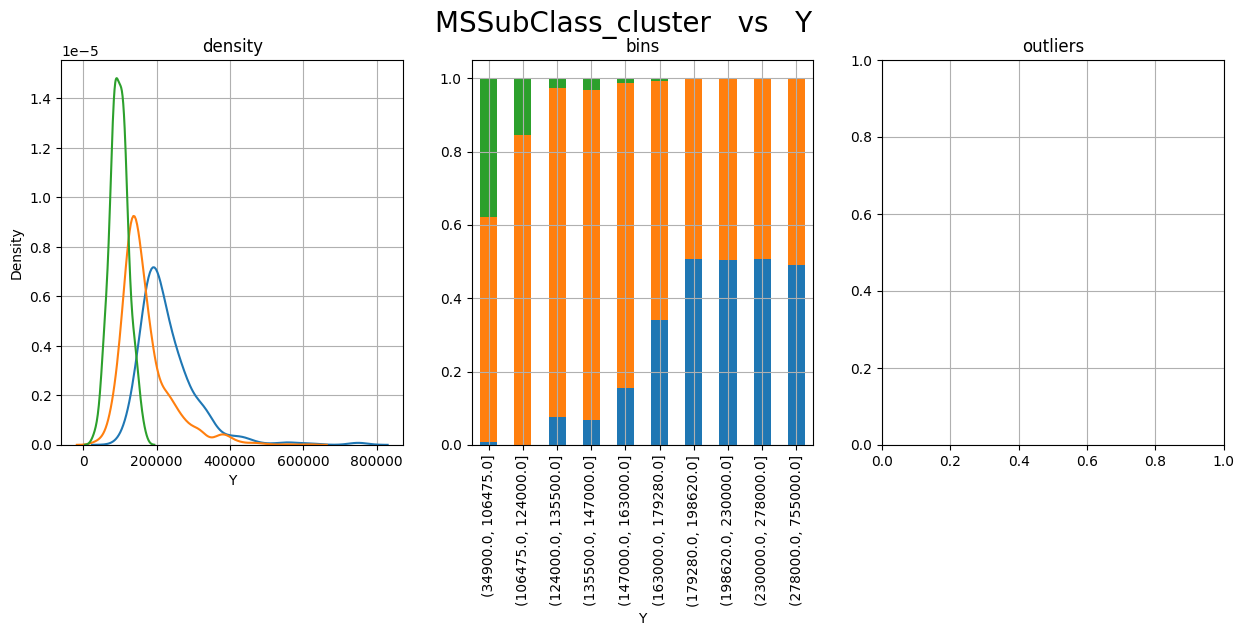

In [48]:
bivariate_plot(dtf, x="MSSubClass_cluster", y="Y", figsize=(15,5))

In [49]:
#-> MSSubClass_cluster is Predictive: different lot classes (clusters) lead to different house prices.
features.append("MSSubClass_cluster")

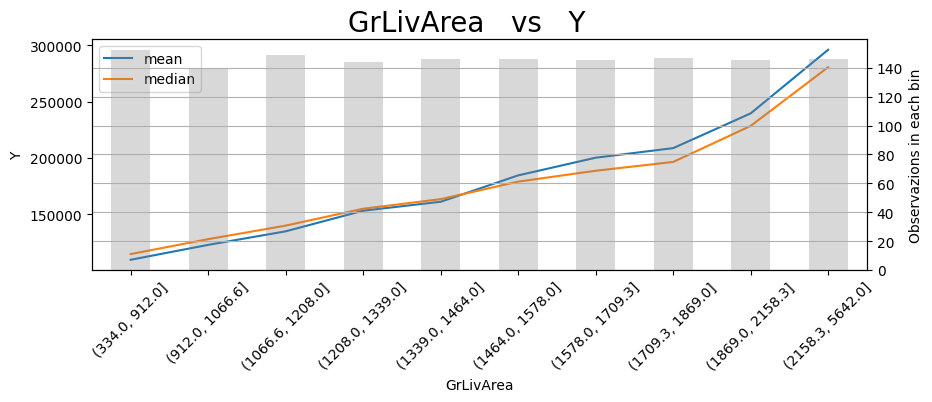

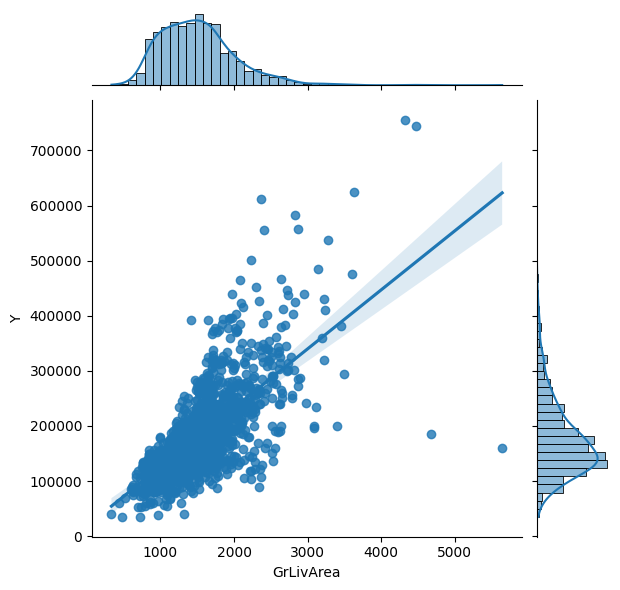

In [50]:
#--- GrLivArea ---#
bivariate_plot(dtf, x="GrLivArea", y="Y", figsize=(10,3))

In [51]:
#-> GrLivArea is Predctive: the larger the living area the higher the price.
features.append("GrLivArea")

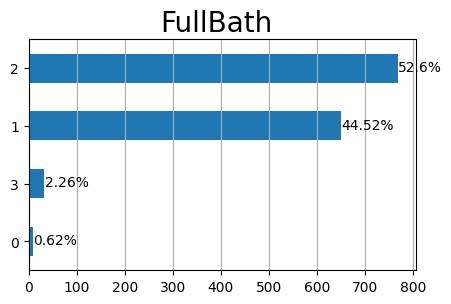

In [52]:
#--- FullBath ---#
freqdist_plot(dtf, "FullBath", figsize=(5,3))

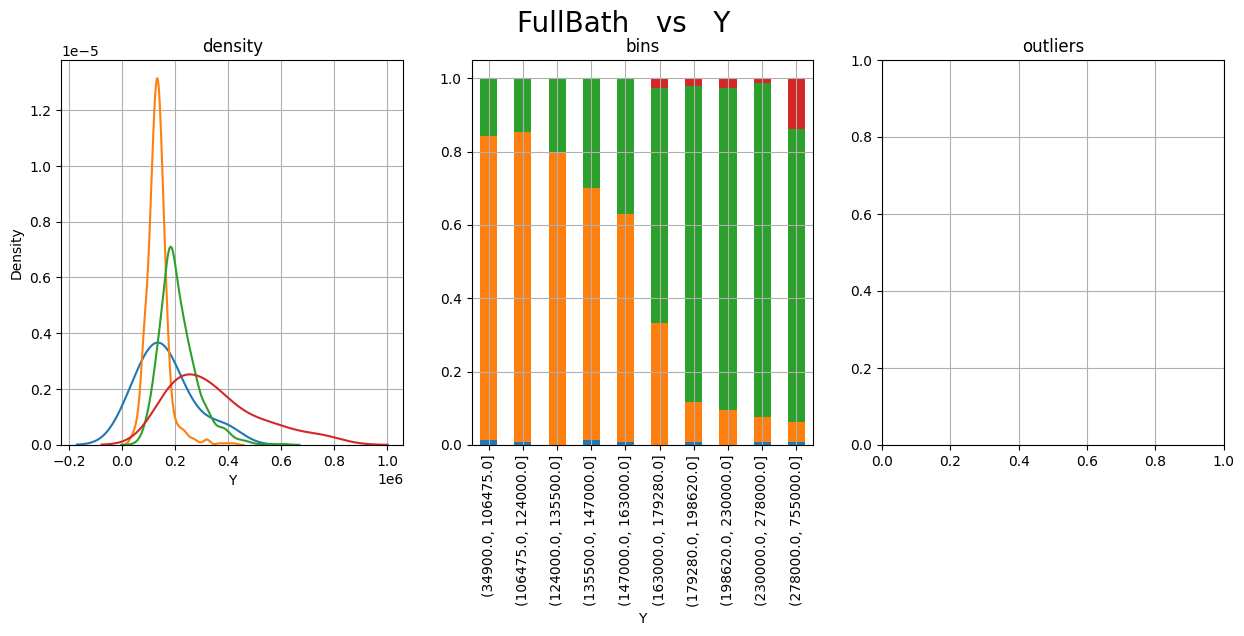

In [53]:
bivariate_plot(dtf, x="FullBath", y="Y", figsize=(15,5))

In [54]:
from mlforeveryone.correlation import test_corr

In [55]:
# I can't tell if the samples are statistically significant, I'll test that:
coeff, p = test_corr(dtf, x="FullBath", y="Y")

Anova F: the variables are Correlated (p-value: 0.0)


In [56]:
#-> FullBath is Predctive: the more bathrooms there are the higher the price.
features.append("FullBath")

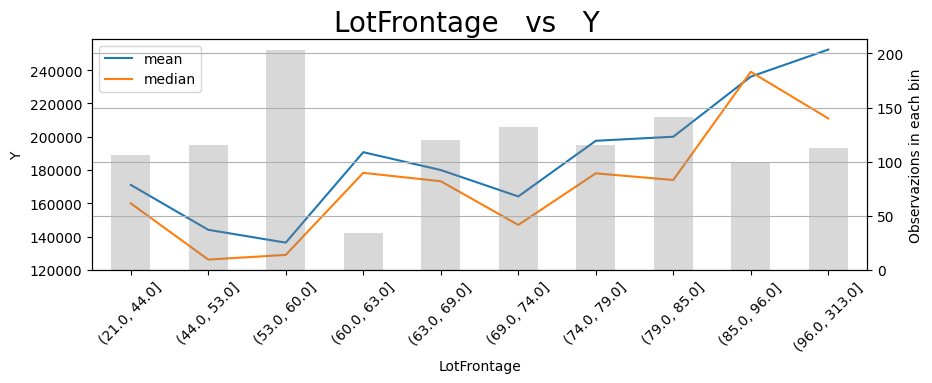

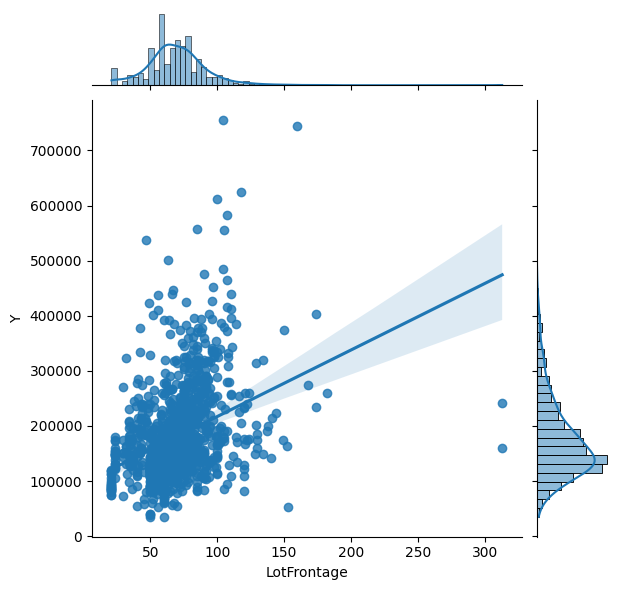

In [57]:
#--- LotFrontage ---#
bivariate_plot(dtf, x="LotFrontage", y="Y", figsize=(10,3))

In [58]:
# I can't tell if the samples are statistically significant, I'll test that:
coeff, p = test_corr(dtf, x="LotFrontage", y="Y")

Pearson Correlation: 0.352 Significant (p-value: 0.0)


In [59]:
#-> LotFrontage is Predictive: the larger is the street connected to property the higher is the house price.
features.append("LotFrontage")

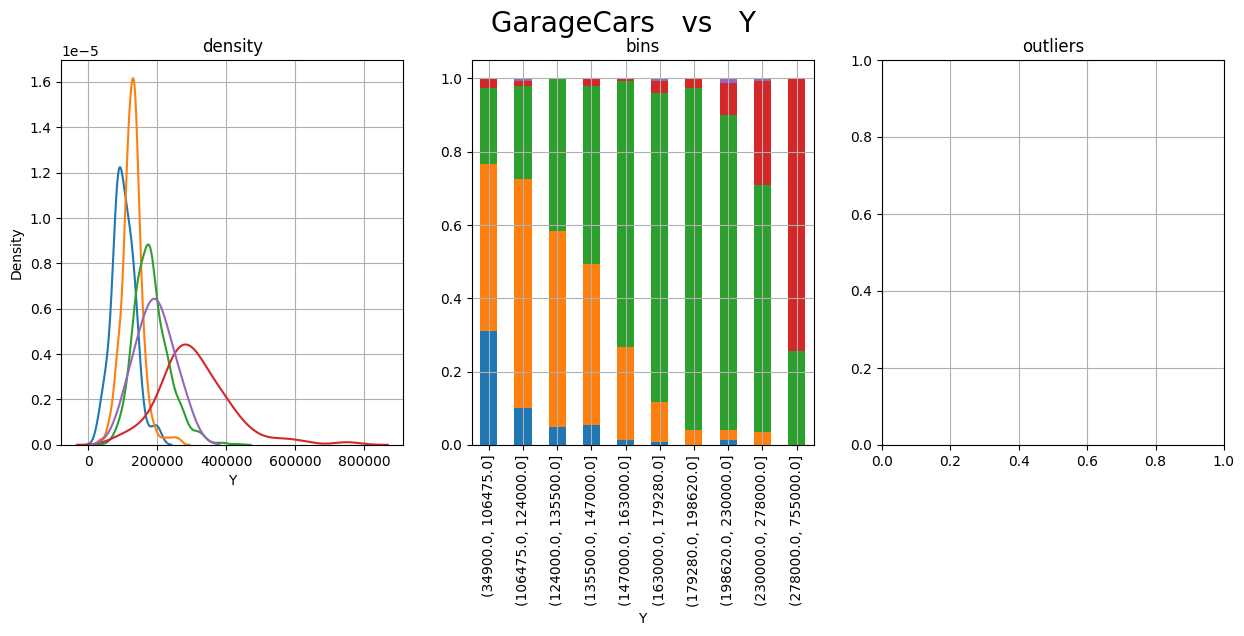

In [60]:
#--- GarageCars ---#
bivariate_plot(dtf, x="GarageCars", y="Y", figsize=(15,5))

In [61]:
#-> GarageCars is Predictive: the larger is the garage (in cars) the higher is the house price.
features.append("GarageCars")

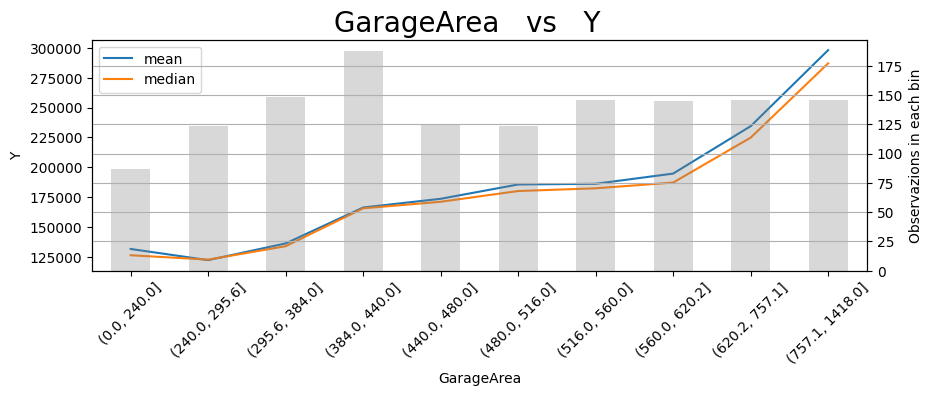

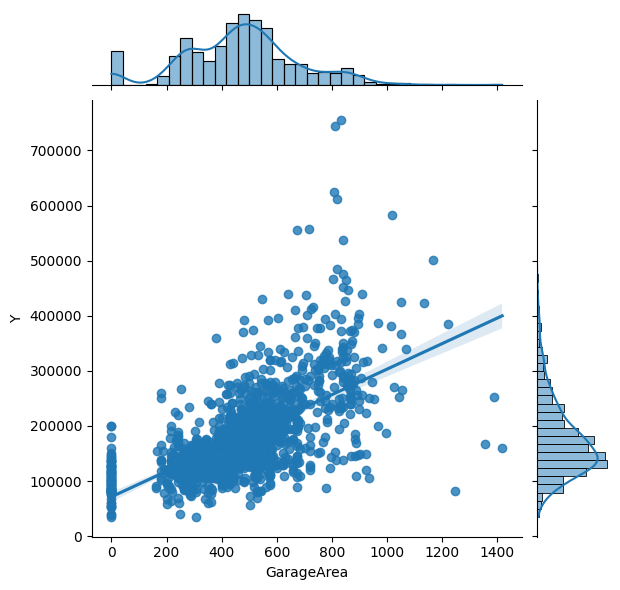

In [62]:
#--- GarageArea ---#
bivariate_plot(dtf, x="GarageArea", y="Y", figsize=(10,3))

In [63]:
#-> GarageArea is Predictive: the larger is the garage (is sqrfeet) the higher is the house price.
features.append("GarageArea")

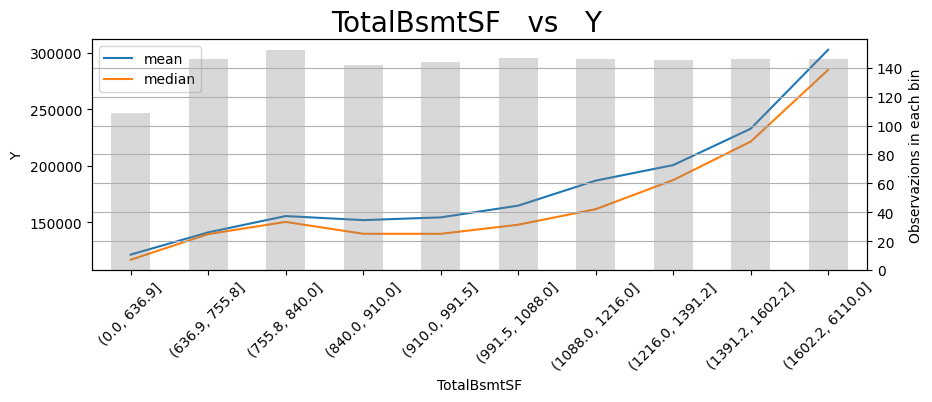

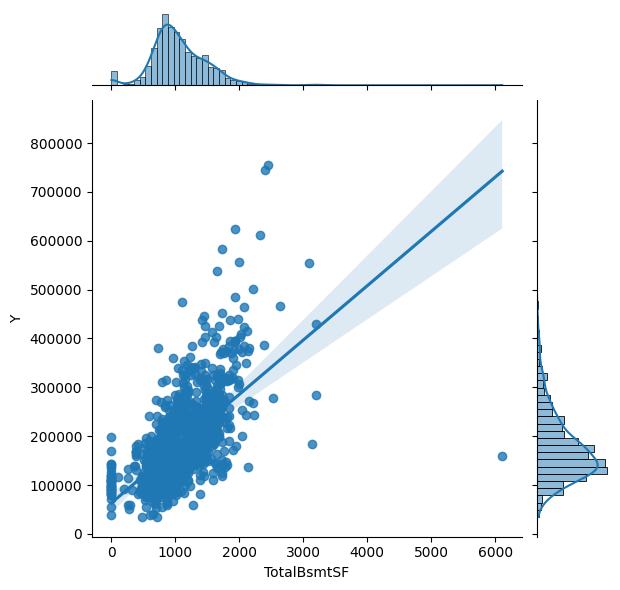

In [64]:
#--- TotalBsmtSF, ---#
bivariate_plot(dtf, x="TotalBsmtSF", y="Y", figsize=(10,3))

In [65]:
#-> TotalBsmtSF, is Predictive: the larger is the basement the higher is the house price.
features.append("TotalBsmtSF")

In [66]:
dtf = dtf[features+["Y"]]
dtf.head()

,OverallQual,YearBuilt,YearRemodAdd,MSSubClass_cluster,GrLivArea,FullBath,LotFrontage,GarageCars,GarageArea,TotalBsmtSF,Y
Id,,,,,,,,,,,
1,7,2003,2003,max,1710,2,65.0,2,548,856,208500
2,6,1976,1976,mean,1262,2,80.0,2,460,1262,181500
3,7,2001,2002,max,1786,2,68.0,2,608,920,223500
4,7,1915,1970,mean,1717,1,60.0,3,642,756,140000
5,8,2000,2000,max,2198,2,84.0,3,836,1145,250000


In [67]:
from mlforeveryone.preprocessing import dtf_partitioning, fill_na, add_dummies, scaling

In [68]:
dtf_train, dtf_test = dtf_partitioning(dtf, y="Y", test_size=0.3, shuffle=False)

X_train shape: (1022, 10) | X_test shape: (438, 10)
y_train mean: 181713.25 | y_test mean: 179073.06
11 features: ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MSSubClass_cluster', 'GrLivArea', 'FullBath', 'LotFrontage', 'GarageCars', 'GarageArea', 'TotalBsmtSF']


In [69]:
dtf_train.head(3)

,OverallQual,YearBuilt,YearRemodAdd,MSSubClass_cluster,GrLivArea,FullBath,LotFrontage,GarageCars,GarageArea,TotalBsmtSF,Y
Id,,,,,,,,,,,
1,7,2003,2003,max,1710,2,65.0,2,548,856,208500
2,6,1976,1976,mean,1262,2,80.0,2,460,1262,181500
3,7,2001,2002,max,1786,2,68.0,2,608,920,223500


In [70]:
dtf_test.head(3)

,OverallQual,YearBuilt,YearRemodAdd,MSSubClass_cluster,GrLivArea,FullBath,LotFrontage,GarageCars,GarageArea,TotalBsmtSF,Y
Id,,,,,,,,,,,
1023,5,1930,1950,mean,1248,1,52.0,1,160,912,87000
1024,7,2005,2006,max,1504,2,43.0,2,437,1346,191000
1025,8,1976,1976,mean,2898,2,NaN,2,665,1565,287000


In [71]:
dtf_train, lotfront_mean = fill_na(dtf_train, x="LotFrontage")

--- Replacing Nas with: 69.78579881656805 ---


In [72]:
dtf_train = add_dummies(dtf_train, x="MSSubClass_cluster", dropx=True)

   MSSubClass_cluster  MSSubClass_cluster_mean  MSSubClass_cluster_min
Id                                                                    
1                 max                        0                       0
2                mean                        1                       0
3                 max                        0                       0
4                mean                        1                       0
5                 max                        0                       0


In [73]:
from sklearn import preprocessing

In [74]:
scalerX = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
scalerY = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))

In [75]:
dtf_train, scalerX, scalerY = scaling(dtf_train, y="Y", scalerX=scalerX, scalerY=scalerY, task="regression")

In [76]:
dtf_train.head()

,OverallQual,YearBuilt,YearRemodAdd,GrLivArea,FullBath,LotFrontage,GarageCars,GarageArea,TotalBsmtSF,MSSubClass_cluster_mean,MSSubClass_cluster_min,Y
Id,,,,,,,,,,,,
1,0.5,0.617021,0.243243,0.395177,0.0,-0.265878,0.0,0.283333,-0.293889,-1.0,0.0,0.526684
2,0.0,0.042553,-0.486486,-0.301828,0.0,0.567456,0.0,-0.083333,0.493695,0.0,0.0,0.208944
3,0.5,0.574468,0.216216,0.513419,0.0,-0.099211,0.0,0.533333,-0.169738,-1.0,0.0,0.703207
4,0.5,-1.255319,-0.648649,0.406068,-1.0,-0.543655,1.0,0.675000,-0.487876,0.0,0.0,-0.279435
5,1.0,0.553191,0.162162,1.154415,0.0,0.789678,1.0,1.483333,0.266731,-1.0,0.0,1.015063


Shape: (1022, 12)
-----------------
OverallQual --> Type:cat | Nas: 0(0%) | Categories: 10
YearBuilt --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(0)
YearRemodAdd --> Type:num | Nas: 0(0%) | Min-Max: (-1)-(0)
GrLivArea --> Type:num | Nas: 0(0%) | Min-Max: (-1)-(5)
FullBath --> Type:cat | Nas: 0(0%) | Categories: 4
LotFrontage --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(13)
GarageCars --> Type:cat | Nas: 0(0%) | Categories: 5
GarageArea --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(3)
TotalBsmtSF --> Type:num | Nas: 0(0%) | Min-Max: (-1)-(4)
MSSubClass_cluster_mean --> Type:cat | Nas: 0(0%) | Categories: 2
MSSubClass_cluster_min --> Type:cat | Nas: 0(0%) | Categories: 2
Y --> Type:num | Nas: 0(0%) | Min-Max: (-1)-(6)


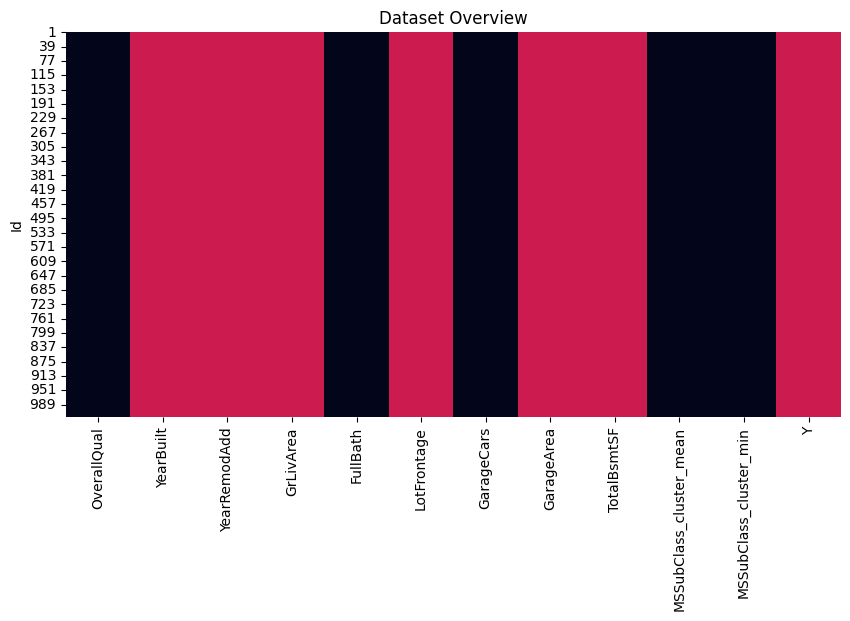

 Categerocial   Numerical/DateTime   NaN 


In [77]:
dtf_overview(dtf_train)

In [78]:
## Na
dtf_test = fill_na(dtf_test, x="LotFrontage", value=lotfront_mean)

--- Replacing Nas with: 69.78579881656805 ---


In [79]:
## Categorical
dtf_test = add_dummies(dtf_test, x="MSSubClass_cluster", dropx=True)

     MSSubClass_cluster  MSSubClass_cluster_mean  MSSubClass_cluster_min
Id                                                                      
1023               mean                        1                       0
1024                max                        0                       0
1025               mean                        1                       0
1026               mean                        1                       0
1027               mean                        1                       0


In [80]:
dtf_test = dtf_test[dtf_train.columns]
dtf_test.head()

,OverallQual,YearBuilt,YearRemodAdd,GrLivArea,FullBath,LotFrontage,GarageCars,GarageArea,TotalBsmtSF,MSSubClass_cluster_mean,MSSubClass_cluster_min,Y
Id,,,,,,,,,,,,
1023,5,1930,1950,1248,1,52.000000,1,160,912,1,0,87000
1024,7,2005,2006,1504,2,43.000000,2,437,1346,0,0,191000
1025,8,1976,1976,2898,2,69.785799,2,665,1565,1,0,287000
1026,5,1972,1972,882,1,70.000000,2,461,882,1,0,112500
1027,5,1960,1960,1264,1,73.000000,2,461,1268,1,0,167500


In [81]:
## Scale
dtf_test, _, _ = scaling(dtf_test, y="Y", scalerX=scalerX, scalerY=scalerY, fitted=True, task="regression")

Shape: (438, 12)
-----------------
OverallQual --> Type:cat | Nas: 0(0%) | Categories: 9
YearBuilt --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(0)
YearRemodAdd --> Type:num | Nas: 0(0%) | Min-Max: (-1)-(0)
GrLivArea --> Type:num | Nas: 0(0%) | Min-Max: (-1)-(6)
FullBath --> Type:cat | Nas: 0(0%) | Categories: 4
LotFrontage --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(13)
GarageCars --> Type:cat | Nas: 0(0%) | Categories: 5
GarageArea --> Type:num | Nas: 0(0%) | Min-Max: (-2)-(3)
TotalBsmtSF --> Type:num | Nas: 0(0%) | Min-Max: (-1)-(9)
MSSubClass_cluster_mean --> Type:cat | Nas: 0(0%) | Categories: 2
MSSubClass_cluster_min --> Type:cat | Nas: 0(0%) | Categories: 2
Y --> Type:num | Nas: 0(0%) | Min-Max: (52500)-(745000)


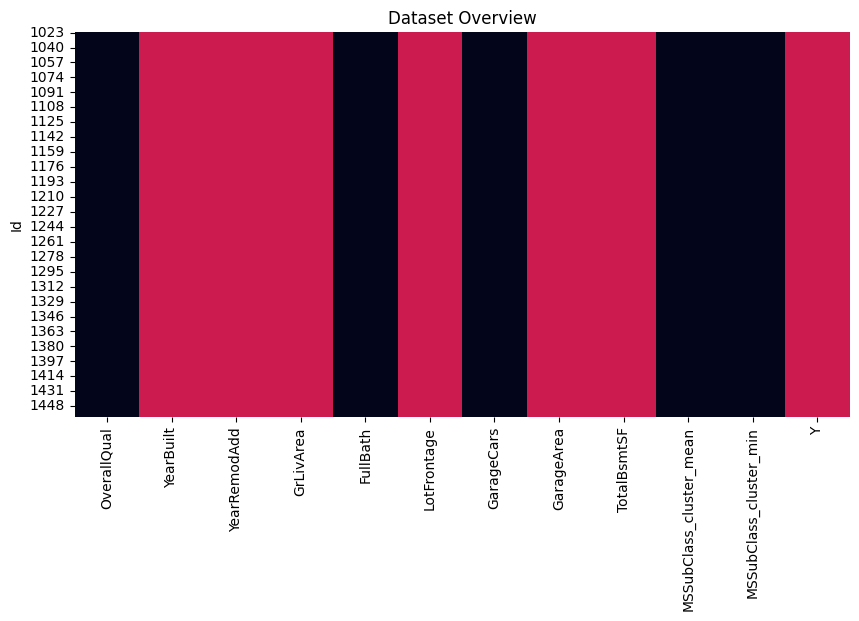

 Categerocial   Numerical/DateTime   NaN 


In [82]:
dtf_overview(dtf_test)

In [83]:
from mlforeveryone.correlation import corr_matrix

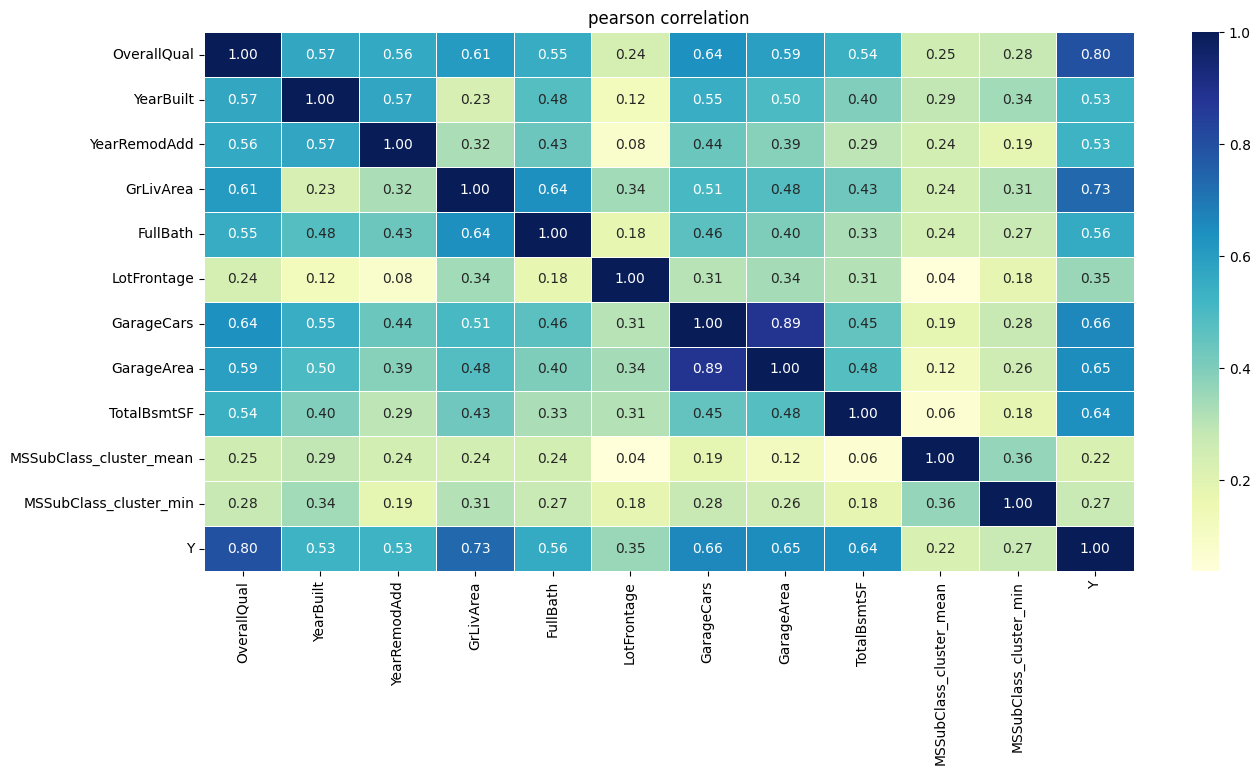

In [84]:
corr = corr_matrix(dtf_train, method="pearson", negative=False, annotation=True, figsize=(15,7))

In [85]:
from mlforeveryone.feature import features_selection, features_importance

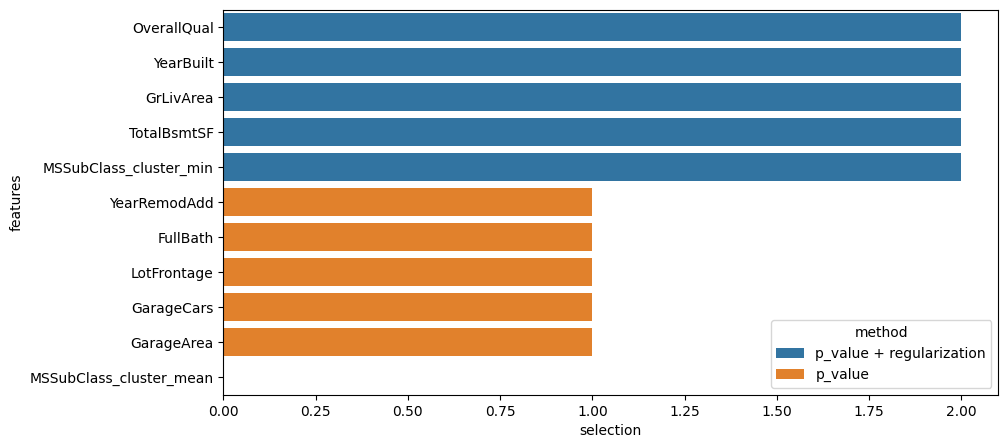

In [86]:
#--- p values ---#
dic_feat_sel = features_selection(dtf_train, y="Y", task="regression", top=10, figsize=(10,5))

In [87]:
from sklearn import ensemble

In [88]:
#--- importance ---#
model = ensemble.RandomForestRegressor(n_estimators=100, criterion="squared_error", random_state=0)



--- model used ---
RandomForestRegressor(random_state=0)


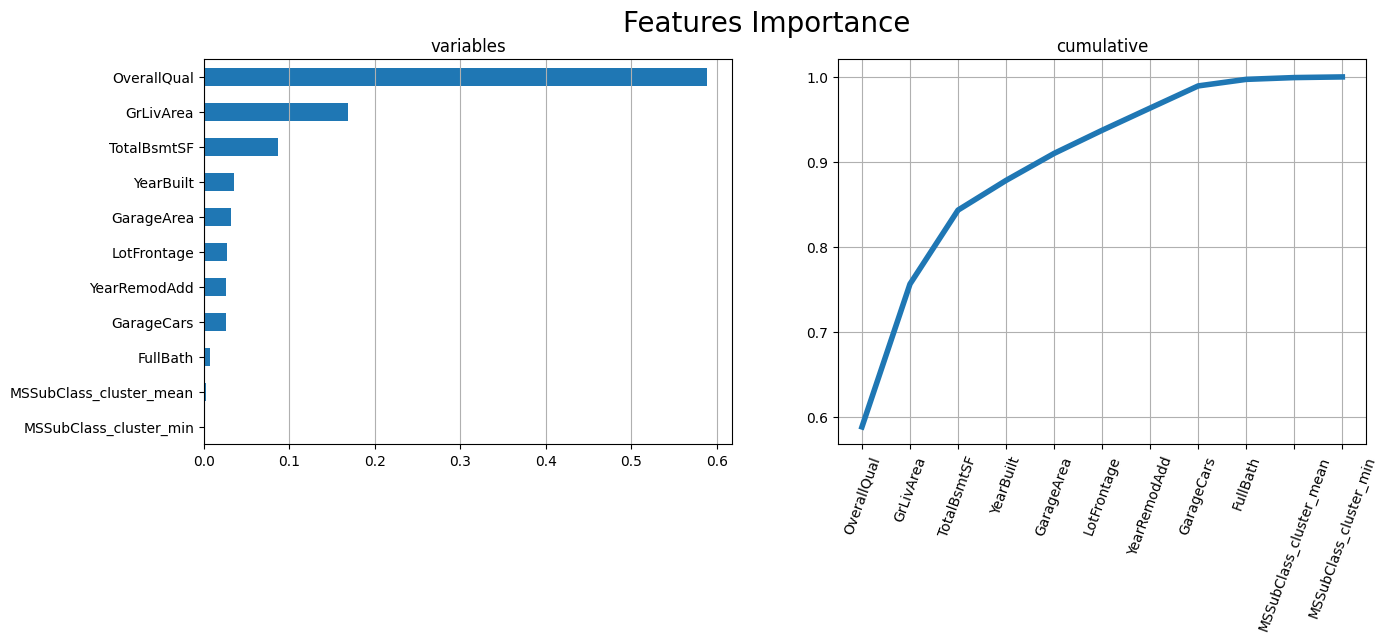

In [89]:
feat_imp = features_importance(X=dtf_train.drop("Y",axis=1).values, y=dtf_train["Y"].values,
                               X_names=dtf_train.drop("Y",axis=1).columns.tolist(),
                               model=model, task="regression", figsize=(15,5))

In [90]:
# -> selection
X_names = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'GarageArea']

In [91]:
X_train = dtf_train[X_names].values
y_train = dtf_train["Y"].values

In [92]:
model = ensemble.GradientBoostingRegressor()

In [93]:
param_dic = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],      #weighting factor for the corrections by new trees when added to the model
             'n_estimators':[100,250,500,750,1000,1250,1500,1750],  #number of trees added to the model
             'max_depth':[2,3,4,5,6,7],                             #maximum depth of the tree
             'min_samples_split':[2,4,6,8,10,20,40,60,100],         #sets the minimum number of samples to split
             'min_samples_leaf':[1,3,5,7,9],                        #the minimum number of samples to form a leaf
             'max_features':[2,3,4,5,6,7],                          #square root of features is usually a good starting point
             'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}            #the fraction of samples to be used for fitting the individual base learners. Values lower than 1 generally lead to a reduction of variance and an increase in bias.

In [94]:
from mlforeveryone.regression_model import tune_regr_model
from mlforeveryone.regression_model import evaluate_regr_model

In [95]:
from mlforeveryone.regression_model import fit_ml_regr

--- RandomSearch ---
Best Model parameters: {'subsample': 0.75, 'n_estimators': 750, 'min_samples_split': 60, 'min_samples_leaf': 5, 'max_features': 4, 'max_depth': 4, 'learning_rate': 0.005}
Best Model r2: 0.82

--- Kfold Validation ---
r2 mean - base model: 0.78  --> best model: 1


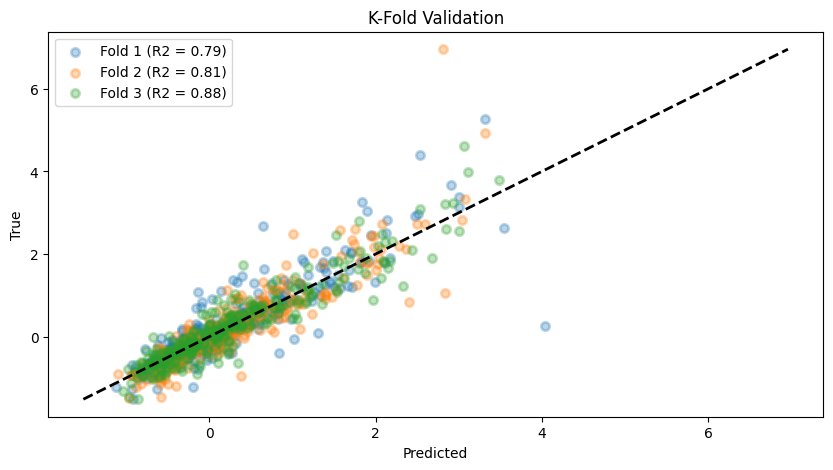

In [96]:
# this takes a while
model = tune_regr_model(X_train, y_train, model, param_dic, scoring="r2",
                        searchtype="RandomSearch", n_iter=30, cv=3, figsize=(10,5))

In [97]:
X_test = dtf_test[X_names].values
y_test = dtf_test["Y"].values

In [98]:
model, predicted = fit_ml_regr(model, X_train, y_train, X_test, scalerY)

R2 (explained variance): 0.79
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.11
Mean Absolute Error (Σ|y-pred|/n): 21,334
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 36,251
Max Error: -330,348


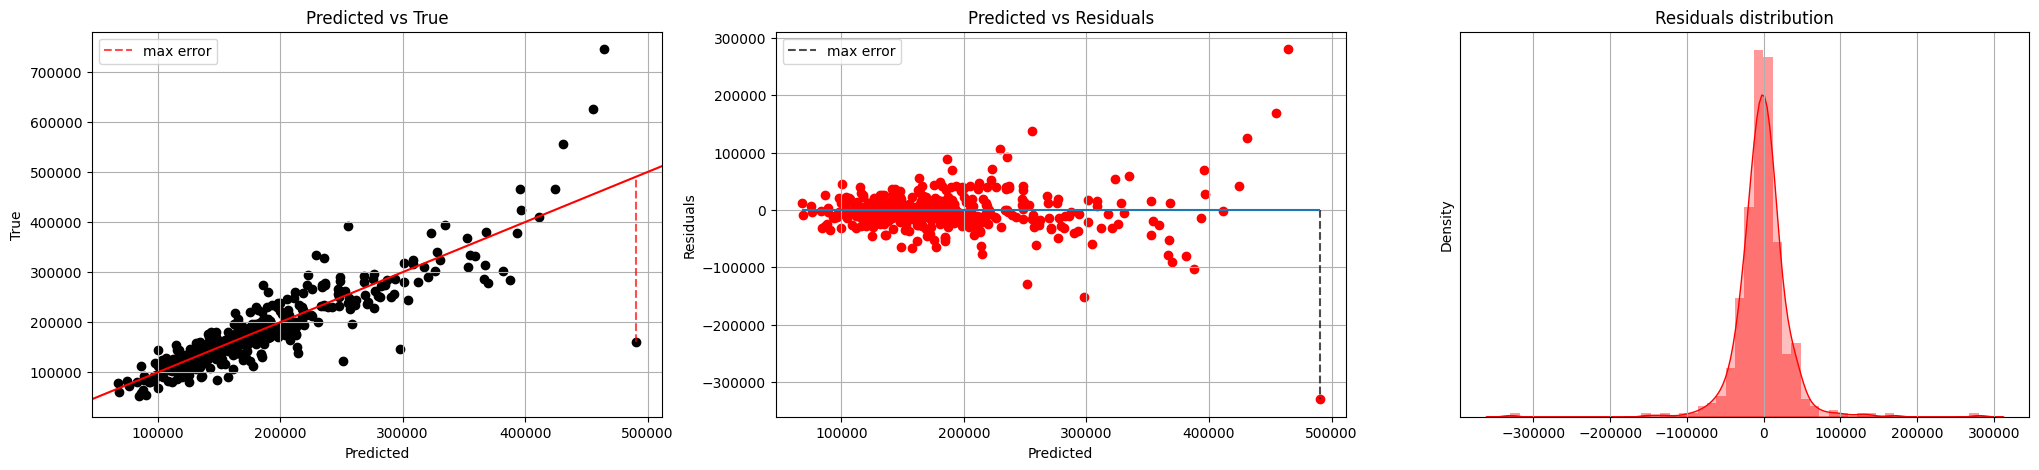

In [99]:
evaluate_regr_model(y_test, predicted, figsize=(25,5))

In [100]:
from mlforeveryone.explain import explainer_lime

True: 191,000 --> Pred: 193,180


,feature,effect
0,TotalBsmtSF > 0.59,0.314050
1,YearBuilt > 0.57,0.217562
2,0.00 < OverallQual <= 0.50,0.160964
3,0.00 < GrLivArea <= 0.49,-0.038369
4,-0.60 < GarageArea <= 0.00,-0.014471


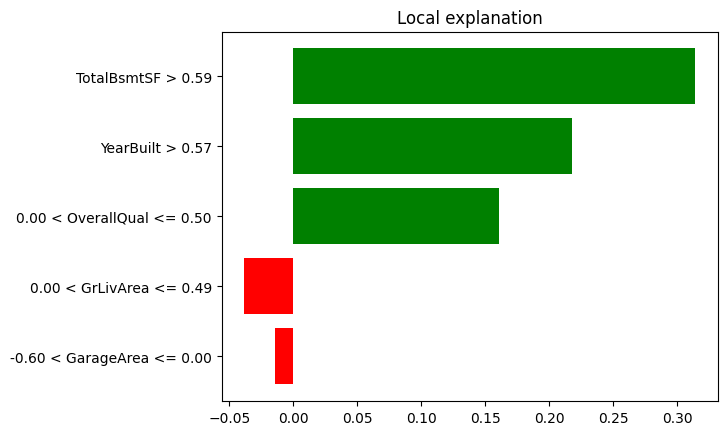

In [101]:
i = 1
print("True:", "{:,.0f}".format(y_test[i]), "--> Pred:", "{:,.0f}".format(predicted[i]))


explainer_lime(X_train, X_names, model, y_train, X_instance=X_test[i], task="regression", top=10)

In [102]:
from sklearn import linear_model

In [103]:
model2d = linear_model.LinearRegression()

In [104]:
from mlforeveryone.visualize import plot3d_regr_model

In [105]:
#%matplotlib notebook
plot3d_regr_model(X_train, y_train, X_test, y_test, scalerY, model2d, rotate=(30,0), figsize=(7,5))

--- reducing dimensions to 3 ---
--- fitting 2d model ---
--- plotting test set ---


<Figure size 700x500 with 0 Axes>